## Identification of Nonlinear Systems
### <label style="color:#555555">Using Laguerre Expansion of Kernels</label>
---

### Generalized Laguerre polynomials
For arbitary real $\alpha$ the polynomial solutions of the differential equation

$$xy'' + (\alpha + 1 - x)y' + ny = 0$$

are called **generalized Laguerre polynomials**, which can also be defined recursively with the first two polynomials defined as

\begin{align}
L_0^{(\alpha)}(x) = & 1 
\\
L_1^{(\alpha)}(x) = & 1 + \alpha - x
\end{align}

and then using the following recurrence relation for any $k\ge1$:

$$L_{k+1}^{(\alpha)}(x) = \frac{(2k + 1 + \alpha - x)L_k^{(\alpha)}(x) - (k + \alpha)L_{k-1}^{(\alpha)}(x)}{k + 1}$$

The closed form is 
$$L_n^{(\alpha)}(x) = \frac{x^{-\alpha}e^x}{n!}\frac{d^n}{dx^n}(e^{-x}x^{n+\alpha})$$

### Orthogonality
The generalized Laguerre polynomials are orthogonal over $[0, \infty)$ with respect to the measure with weighting function $x^\alpha e^{-x}$:

$$<L_n^{(\alpha)}(x), L_m^{(\alpha)}(x)> := \int_0^\infty x^\alpha e^{-x}L_n^{(\alpha)}(x)L_m^{(\alpha)}(x)dx = \frac{\Gamma(n+\alpha+1)}{n!}\delta_{n,m}$$

<label style="color:red">The introduction above turns out to have nothing to do with discrete orthonormal Laguerre basis ...</label>

### Discrete-time Laguerre expansion method
The Wiener series expansion takes the form:

\begin{align}
y(t) & = \sum_{n=0}^\infty G_n[k_n, x(t)]
\\
& = \sum_{n=0}^\infty \sum_{i=0}^{[n/2]} G_n^{(i)}[k_n, x(t)]
\\
& = \sum_{n=0}^\infty \sum_{i=0}^{[n/2]}\frac{(-1)^in!A^i}{2^i(n-2i)!i!}\int_{\mathbb{R}^{n-i}}k(\sigma_1, \cdots, \sigma_{n-2i}, \tau_1, \tau_1, \cdots, \tau_i, \tau_i)\cdot\prod_{j=1}^{n-2i}x(t-\sigma_j)d\sigma_j\cdot\prod_{j=1}^id\tau_j 
\tag{1}
\end{align}

For any Wiener functional $Q_m[q_m, x(t)]$,

\begin{align}
E[y(t)Q_m[q_m, x(t)]] & = \sum_{n=0}^\infty E[G_n[k_n, x(t)]Q_m[q_m, x(t)]]
\\
& = E[G_m[k_m, x(t)]Q_m[q_m, x(t)]]
\\
& = m!A^m\int_{\mathbb{R}^m}k_m(\sigma_1, \cdots, \sigma_m)q_m(\sigma_1, \cdots, \sigma_m)d\sigma_1\cdots d\sigma_m
\end{align}

### Discrete-time orthonormal Laguerre function
The $j$th order discrete-time orthonormal Laguerre function is defined as

\begin{equation}
\phi_{j}(\tau) = \alpha^\frac{\tau - j}{2} (1-\alpha)^\frac{1}{2}\sum_{k=0}^j(-1)^k{\tau \choose k}{j \choose k}\alpha^{j-k}(1-\alpha)^{k}
\quad (\tau \ge 0)
\end{equation}

where $\alpha$ is the discrete-time Laguerre parameter ($0 < \alpha < 1$) which determines the rate of exponetial asymptotic decline of these functions. 

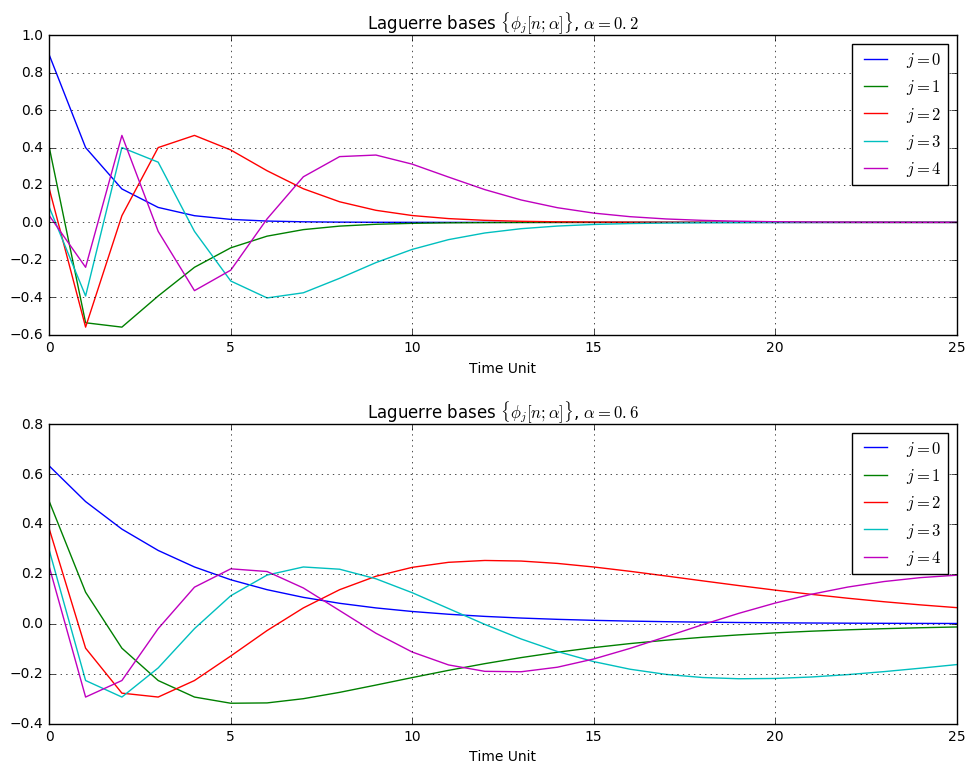

In [2]:
Laguerre.plot_laguerre()

As we can see $\{\phi_j(\tau)\}$ is a complete orthonormal basis of the Hilbert space $l^2(0, \infty)$ and each Wiener kernel can be expanded as

$$k_m(\tau_1, \cdots, \tau_m) = \sum_{j_1}\cdots\sum_{j_m}k_{j_1\cdots j_m}\phi_{j_1}(\tau_1)\cdots\phi_{j_m}(\tau_m)$$

in which 

$$k_{j_1\cdots j_m} = \int_{\mathbb{R}^m}k_m(\tau_1, \cdots, \tau_m)\phi_{j_1}(\tau_1)\cdots\phi_{j_m}(\tau_m)d\tau_1\cdots d\tau_m$$

Thus the discrete form of equation (1) can be rewritten as 

$$y(t) = \sum_{n=0}^\infty \sum_{j_1}\cdots\sum_{j_n}k_{j_1\cdots j_n}\Phi_{j_1}[x](t)\cdots\Phi_{j_n}[x](t)$$

in which 

$$\Phi_j[x](t) = T\sum_{\tau=0}^M \phi_j(\tau)x(t-\tau)$$

The input specification $[x]$ in $\Phi_j[x](t)$ is usually ommited for simplification and the computation of the variables $\{\Phi_j(t)\}$ can be accelerated significantly by use of the recursive relation:

$$\Phi_j(t) = \sqrt{\alpha}~\Phi_j(t - 1) + \sqrt{\alpha}~\Phi_{j - 1}(t) - \Phi_{j - 1}(t - 1)$$

which is due to the paricular form of the discrete-time Laguerre functions. Computation of this recursive relation must be initialized by the following recursive equation that yields $\phi_0(t)$ for given input $x(t)$:

$$\Phi_0(t) = \sqrt{\alpha}~\Phi_0(t - 1) + T\sqrt{1 - \alpha}~[x(t) - (\sqrt{\alpha})^N~x(n - N)]$$

In [3] the equation seems to be erroneous:

<div style="color:red">$$\Phi_0(t) = \sqrt{\alpha}~\Phi_0(t - 1) + T\sqrt{1 - \alpha}~x(t)$$</div>

### References
---
[1] WIKIPEDIA, Laguerre polynomials, [https://en.wikipedia.org/wiki/Laguerre_polynomials](https://en.wikipedia.org/wiki/Laguerre_polynomials).

[2] W.J. Rugh, Nonlinear System Theory: The Volterra-Wiener Approach, Johns Hopkins University Press, Baltimore, 1980.

[3] V. Z. Marmarelis, Identification of nonlinear biological systems using Laguerre expansions of kernels, Ann. Biomed. Eng., vol. 21, no. 6, pp. 573–589, Nov. 1993.


### Remarks
---
**Remark 1** Given

$$G_2[\phi_{i_1}\phi_{i_2}, x(t)] = \int_{\mathbb{R}^2}\frac{1}{2}[\phi_{i_1}(\tau_1)\phi_{i_2}(\tau_2)+\phi_{i_1}(\tau_2)\phi_{i_2}(\tau_1)]x(t-\tau_1)x(t-\tau_2)d\tau_1d\tau_2 - A\int_{\mathbb{R}}\phi_{i_1}(\tau)\phi_{i_2}(\tau)d\tau$$

and 

$$\int_{\mathbb{R}}\phi_{i}(t)\phi_{j}(t)dt = \left \{
\begin{eqnarray}
0, & \quad i \ne j
\\
1, & \quad i = j
\end{eqnarray}
\right.$$

we have

\begin{eqnarray}
E[y(t)G_2[\phi_{i_1}\phi_{i_2},x(t)]] & = & E[\sum_{n=0}^\infty G_n[k_n, x(t)]G_2[\phi_{i_1}\phi_{i_2}, x(t)]] 
\\
& = & E[G_2[k_2, x(t)]G_2[\phi_{i_1}\phi_{i_2}, x(t)]] 
\\
& = & \int_{\mathbb{R}^4}\frac{1}{2}k_2(\sigma_1, \sigma_2)[\phi_{i_1}(\tau_1)\phi_{i_2}(\tau_2)+\phi_{i_1}(\tau_2)\phi_{i_2}(\tau_1)]
E[x(t-\sigma_1)x(t-\sigma_2)x(t-\tau_1)x(t-\tau_2)]d\sigma_1 d\sigma_2 d\tau_1 d\tau_2 
\\
&& - A\int_{\mathbb{R}^2}k_2(\sigma, \sigma)\phi_{i_1}(\tau_1)\phi_{i_2}(\tau_2)E[x(t-\tau_1)x(t-\tau_2)]d\sigma d\tau_1 d\tau_2
\\
& = & 2A^2\frac{1}{2}[k_{i_1i_2}+k_{i_2i_1}] - 0 = 2A^2k_{i_1i_2}
\end{eqnarray}

In [1]:
# Do some setups
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path += ['..\\..\\']

from models import Laguerre

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2